#### Understanding The Data

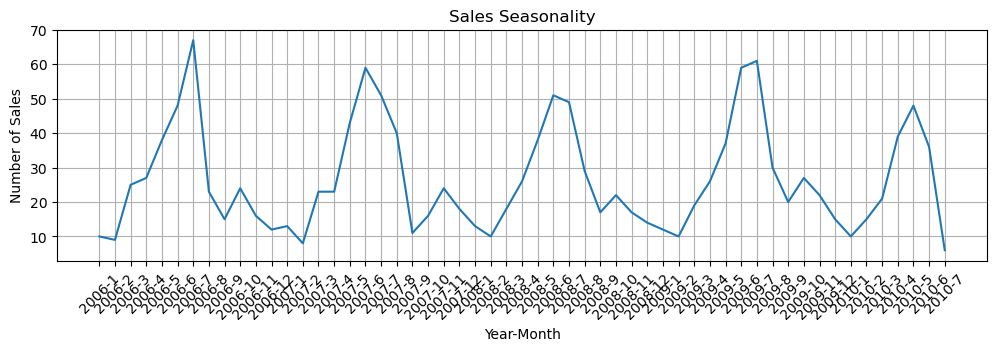

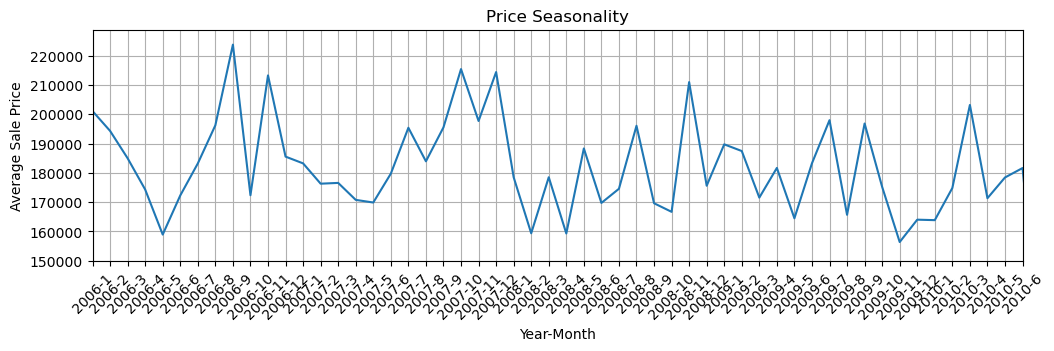

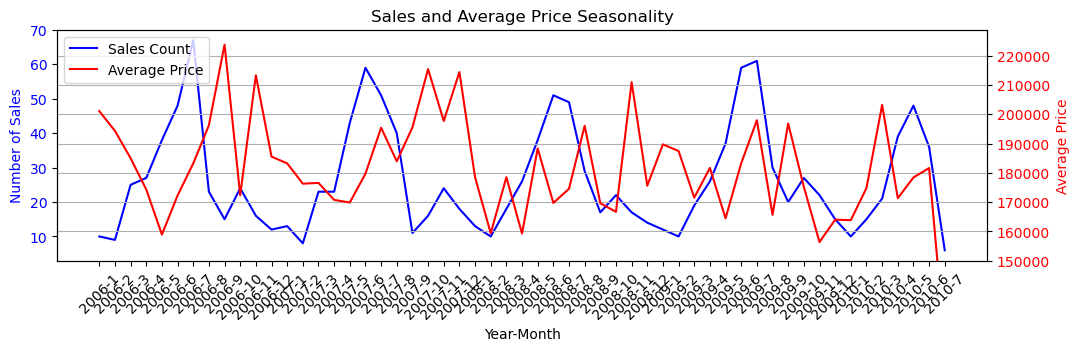

In [ ]:
# Looking for seasonality in number of sales 
sales_grouped = filtered_df.groupby(['YrSold', 'MoSold']).size()
sales_grouped_reset = sales_grouped.reset_index(name='Count')
sales_grouped_reset['Year-Month'] = sales_grouped_reset['YrSold'].astype(str) + '-' + sales_grouped_reset['MoSold'].astype(str)
plt.figure(figsize=(12, 3))
plt.plot(sales_grouped_reset['Year-Month'], sales_grouped_reset['Count'])
plt.xticks(rotation=45)
plt.title('Sales Seasonality')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.grid(True)

#looking for seasonality in sale prices 
price_grouped = filtered_df.groupby(['YrSold', 'MoSold'])['SalePrice'].mean()
price_grouped_reset = price_grouped.reset_index(name='AvgPrice')
price_grouped_reset['Year-Month'] = price_grouped_reset['YrSold'].astype(str) + '-' + price_grouped_reset['MoSold'].astype(str)
plt.figure(figsize=(12, 3))
plt.plot(price_grouped_reset['Year-Month'], price_grouped_reset['AvgPrice'])
plt.xticks(rotation=45)
plt.title('Price Seasonality')
plt.xlabel('Year-Month')
plt.ylabel('Average Sale Price')
plt.xlim('2006-1', '2010-6')
plt.ylim(150000)
plt.grid(True)

# Looking for correlation in both seasonality patterns 
fig, ax1 = plt.subplots(figsize=(12, 3))

ax1.plot(sales_grouped_reset['Year-Month'], sales_grouped_reset['Count'], label='Sales Count', color='blue')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(price_grouped_reset['Year-Month'], price_grouped_reset['AvgPrice'], label='Average Price', color='red')
ax2.set_ylabel('Average Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ax2.set_ylim(150000)
plt.title('Sales and Average Price Seasonality')
plt.grid(True)
plt.show()

The plots above demonstrate pretty clear seasonality in two features: 
* Sales seasonality: we can see a peak in the number of sales on a yearly basis around May-June, followed by a decrease in sales from June to January, with mainly January as the weakest month. 
* Price seasonality: We can see some seasonality in sales prices, albeit less consistent than in the number of sales case. 

Instrestingly, py looking at the combined plot we can see some periods where the number of sales drops down drastically while average price hits a peak. 

In [ ]:
# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(train_df, columns=categorical_columns)

# Calculate correlation with 'SalePrice'
correlation = df_encoded.corr()
categorical_correlation = correlation['SalePrice'].drop(train_df.select_dtypes(include=[np.number]).columns)

# Sort and display the correlations
sorted_correlation = categorical_correlation.sort_values(ascending=False)
print(sorted_correlation.head(10))  # Displaying top 10 for brevity


BsmtQual_Ex             0.553105
KitchenQual_Ex          0.504094
Foundation_PConc        0.497734
ExterQual_Gd            0.452466
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
Neighborhood_NridgHt    0.402149
SaleType_New            0.357509
Name: SalePrice, dtype: float64
